## Parte 2: Implementação Manual do Algoritmo CRC

Nesta etapa, vocês irão implementar as equações acima. O desafio consiste em simular a divisão polinomial utilizando operações bit a bit.

### Instruções:

- **Implemente a Função Principal**: Crie a função calcular_crc_manual conforme o esqueleto abaixo. Ela deve receber a mensagem e o gerador (como strings de bits) e retornar o CRC (o resto da divisão).

- **Implemente a Lógica de Divisão (XOR)**: A operação mod na equação é realizada através de repetidas operações de XOR. Fornecemos uma função auxiliar xor_bits para sua conveniência. O seu trabalho é orquestrar o processo de divisão.


In [2]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def mod(a: str, b: str, debug = False) -> str:
    """
        Realiza a operação binária de mod entre duas string de binários

        Args:
            a: string de binários
            b: string de binários
        Returns:
            A string binária correspondente ao resultado da operação
    """
    mensagem = list(a)
    r = len(b)
    for i in range(len(mensagem)):
        if mensagem[i] == '1' and (i + r) <= (len(mensagem) + 1):
            janela_atual = "".join(mensagem[i: i + r])
            resultado_xor = xor_bits(janela_atual, b)
            for j in range(len(resultado_xor)):
                mensagem[i + j] = resultado_xor[j]
                
    return "".join(mensagem[(-r + 1):])            
            
                
            

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """

    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)
    resto = mod(mensagem_aumentada, gerador_bits, True)
    return resto

def verificar_crc_manual(quadro_bits: str, gerador_bits: str) -> str:
    """
    Verifica a corretude dos bits do quadro com base no gerador e resultado CRC.
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    r = len(gerador_bits) - 1
    resto = mod(quadro_bits, gerador_bits, True)
    return resto[-r:] == '0' * r


In [3]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)
print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
quadro = dados_teste + crc_calculado
print(f"Resultado verificação: {verificar_crc_manual(quadro, gerador_teste)}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010
Resultado verificação: True


## Parte 3: Análise Comparativa de Desempenho

Agora que possuem uma implementação funcional, vamos analisá-la sob uma perspectiva da efiência. Como o seu algoritmo se compara em eficiência a uma biblioteca padrão, que geralmente é implementada em uma linguagem de mais baixo nível (como C) para otimização?

### Instruções:

1. Instale a Biblioteca de Referência: pip install crc

2. Crie um Script de Teste: Este script deverá medir o tempo de execução e o pico de alocação de memória para calcular o CRC de mensagens de tamanhos variados, utilizando tanto a sua função calcular_crc_manual quanto a função da biblioteca crc.

3. Defina os Tamanhos de Mensagem: Teste para, no mínimo, os seguintes tamanhos de payload:
        1500 bytes: Tamanho padrão de um quadro Ethernet (MTU).
        4500 bytes: Um tamanho intermediário de Jumbo Frame.
        9000 bytes: Um tamanho comum para Jumbo Frames.
        Gere dados aleatórios para cada um desses tamanhos.

4. Realize as Medições: Utilize os módulos time e tracemalloc do Python para coletar os dados de desempenho.


## Instalando Biblioteca CRC

In [4]:
pip install crc

Note: you may need to restart the kernel to use updated packages.


## Executando Comparações

In [5]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000, 4500, 6000, 9000, 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 4500 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 9000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.2840886939999905, 'mem_pico_manual': 191.3984375, 'tempo_lib': 0.07402170000000297, 'mem_pico_lib': 1.4453125}, {'tamanho': 3000, 'tempo_manual': 0.4515523880000103, 'mem_pico_manual': 378.5244140625, 'tempo_lib': 0.1302689969999733, 'mem_pico_lib': 1.21875}, {'tamanho': 4500, 'tempo_manual': 0.6486495599999955, 'mem_pico_manual': 566.427734375, 'tempo_lib': 0.2000131670000087, 'mem_pico_lib': 1.21875}, {'tamanho': 6000, 'tempo_manual': 0.8587297450000051, 'mem_pico_manual': 753.4912109375, 'tempo_lib': 0.261295328000017, 'mem_pico_lib': 1.21875}, {'tamanho': 9000, 'tempo_manual': 1.3094071570000096, 'mem_pico_manual': 1128.521484375, 'tempo_lib': 0.39819994999999153, 'mem_pi

## Instalando matplotlib e numby para comparação de performance do manual vs biblioteca

In [6]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


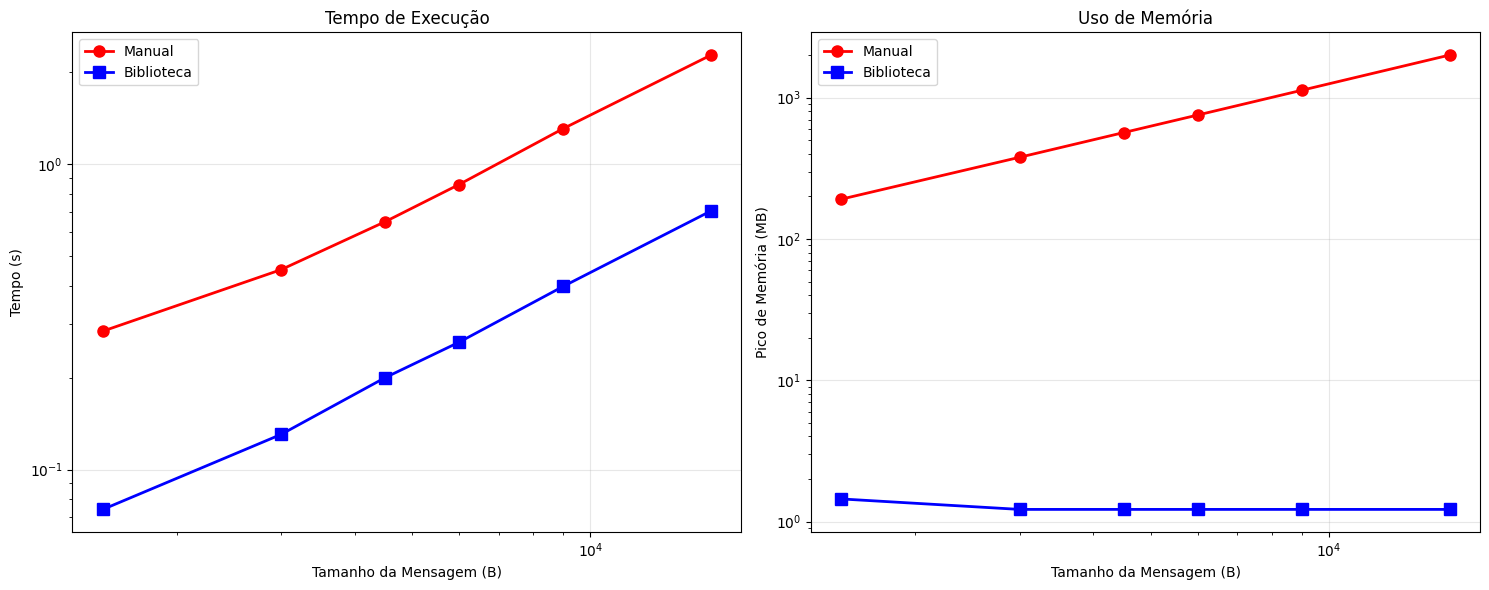

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extrair dados
tamanhos = [d['tamanho'] for d in resultados]
tempo_manual = [d['tempo_manual'] for d in resultados]
tempo_lib = [d['tempo_lib'] for d in resultados]
mem_manual = [d['mem_pico_manual'] for d in resultados]
mem_lib = [d['mem_pico_lib'] for d in resultados]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de Tempo
ax1.plot(tamanhos, tempo_manual, 'o-', label='Manual', linewidth=2, markersize=8, color='red')
ax1.plot(tamanhos, tempo_lib, 's-', label='Biblioteca', linewidth=2, markersize=8, color='blue')
ax1.set_xlabel('Tamanho da Mensagem (B)')
ax1.set_ylabel('Tempo (s)')
ax1.set_title('Tempo de Execução')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
ax1.set_yscale('log')

# Gráfico de Memória
ax2.plot(tamanhos, mem_manual, 'o-', label='Manual', linewidth=2, markersize=8, color='red')
ax2.plot(tamanhos, mem_lib, 's-', label='Biblioteca', linewidth=2, markersize=8, color='blue')
ax2.set_xlabel('Tamanho da Mensagem (B)')
ax2.set_ylabel('Pico de Memória (MB)')
ax2.set_title('Uso de Memória')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

## Resultados

Ao analisar os dois gráficos percebemos que a biblioteca supera a nossa implementação tanto em relação ao tempo de execução e a memória utilizada. Percebemos que tanto o algoritmo criado por nós quanto o algoritmo da biblioteca parecem atuar em tempo linear em relação ao tamannho do input, sendo que o manual apresenta um acréscimo constante em relação ao algoritmo da biblioteca. Já em relação ao uso de memória, percebemos que o algoritmo da biblioteca apresenta um crescimento quase nulo, aparentando usar uma complexidade de uso de espaço de O(1), enquanto o algoritmo que implementados apresenta um crescimento linear do uso de memória.

A máquina utilizada para rodar o experimento de comparação possui as seguintes características:
```
OS: Ubuntu 24.04.2  
Kernel: 6.14.0-24-g 
CPU: Intel Xeon E5-2670 v3 (24) @ 3.100GHz 
Memória: 8GB DDR4 - 2133MHz
```

## Parte 4: Análise Investigativa da Detecção de Erros (Cenário Personalizado)

Esta etapa final é uma investigação para encontrar os limites da sua implementação, utilizando um cenário único para cada aluno.
4.1 - Preparação do seu cenário

a. Sua Mensagem Pessoal: utilize seu seu nome completo e o converta para uma string de bits usando codificação ASCII (8 bits por caractere). Essa será sua MENSAGEM_BASE.

Você pode utilizar o site convertbinary.com
Ex: nome = "Ana" -> bits = "010000010110111001100001"

b. Escolha o seu Gerador pessoal: utilize um dos seguintes polinômios geradores de CRC-16 padrão, com base no último dígito do seu número de matrícula:

> **Final 0, 1, 2**: CRC-16/MODBUS (11000000000000101 ou x 16 + x 15 + x 2 + 1 ) -> 11000000000000101
> 
> **Final 3, 4, 5**: CRC-16/ARC (10001000000100001 ou x 16 + x 12 + x 5 + 1 ) -> 1100000100010001 (representação de 17 bits)
> 
> **Final 6, 7**: CRC-16/MAXIM (10011000000010001 ou x 16 + x 15 + x 14 + x 11 + x 4 + x 2 + x 0 )
> 
> **Final 8, 9**: CRC-16/CCITT-FALSE (10001000000100001 ou x 16 + x 12 + x 5 + 1 ) -> 10001000000100001

⚠️ Prencha a planilha

|VARIAVEL|VALOR|
|---|---|
|MENSAGEM| 	"Lázaro Queiroz do Nascimento" |
|MENSAGEM_BASE|01001100111000010111101001100001011100100110111100100000010100010111010101100101011010010111001001101111011110100010000001100100011011110010000001001110011000010111001101100011011010010110110101100101011011100111010001101111|
|CRC|0101001111101101|


### 4.2 - A Caça aos Erros

Agora é hora de colocar sua função calcular_crc_manual à prova — e comparar a acuracia da sua implementação com a biblioteca!

Para isso, use sua MENSAGEM_BASE fixa e siga o procedimento abaixo dez vezes, variando a posição e o tipo dos erros inseridos de forma aleatória em cada experimento. Seu objetivo é descobrir quais padrões de erro passam despercebidos pelo seu CRC.

#### Procedimento de Teste (a ser repetido 10 vezes)

1. Calcule o CRC da sua MENSAGEM_BASE.
2. Forme o QUADRO_TRANSMITIDO (T(x)): concatene a mensagem com o CRC calculado.
3. Escolha uma posição aleatória e insira um erro de rajada de n bits (e.g., uma sequência contínua de n bits invertidos).
4. Obtenha o QUADRO_CORROMPIDO, aplicando XOR entre o QUADRO_TRANSMITIDO e o padrão de erro.
5. Calcule o CRC do QUADRO_CORROMPIDO, usando:
    - Sua função calcular_crc_manual.
    - A função da biblioteca de CRC.
7. Verifique se o erro foi detectado:
    - Se o CRC resultante for uma sequência de zeros, o erro não foi detectado.
    - Se o CRC resultante for diferente de zero, o erro foi detectado.
8. Registre o padrão de erro e a posição onde ele foi inserido, especialmente se não for detectado por uma das implementações.

### ⚠️ Reportando o Ponto Cego

Como aprendemos, o CRC-16 tem suas limitações. Em teoria, ele detecta todas as rajadas, mas para erros maiores que sua capacidade, nem todos os casos são garantidos.

Sua missão é encontrar pelo menos um padrão de erro de n bits que não seja detectado. Você deve:

    - Reportar em qual dos 10 testes isso ocorreu.
    - Identificar qual implementação falhou (manual, biblioteca ou ambas).
    - Analisar em qual posição e qual padrão foi usado.

Ao final dos testes, compare os resultados entre sua implementação manual e a da biblioteca. Há diferenças? Um dos métodos detectou erros que o outro deixou passar?

### ⚠️ Resultado Esperado:

Você deve entregar um pequeno relatório com:

    - Os 10 padrões de erro testados e suas posições.
    - Indicação de quais erros foram ou não detectados.
    - Qual implementação falhou em cada caso.
    - Reflexão sobre as limitações do CRC, testado e a comparação.


In [30]:
## from random import randint
from crc import Calculator, Crc16, Configuration

mensagem_base = "01001100111000010111101001100001011100100110111100100000010100010111010101100101011010010111001001101111011110100010000001100100011011110010000001001110011000010111001101100011011010010110110101100101011011100111010001101111"
gerador = "10001000000100001"

CCITT_FALSE = Configuration(
    width=16,
    polynomial=0x1021,
    init_value=0x0000,
    final_xor_value=0x0000,
    reverse_input=False,
    reverse_output=False
)

crc_manual = calcular_crc_manual(mensagem_base, gerador)
crc_biblioteca = Calculator(CCITT_FALSE).checksum(bytes(mensagem_base, 'utf-8'))

quadro_manual = mensagem_base + crc_manual
quadro_biblioteca = mensagem_base + bin(crc_biblioteca)[2:]


print(f'CRC manual: {crc_manual}')
print(f'CRC biblioteca: {bin(crc_biblioteca)[2:]}')
print(f'Verificação Manual: {'OK' if verificar_crc_manual(quadro_manual, gerador) else 'FAILED'}')
print(f'Verificação Biblioteca: {'OK' if Calculator(CCITT_FALSE).verify(bytes(mensagem_base, 'utf-8'), crc_biblioteca) else 'FAILED'}')

CRC manual: 0110000011000001
CRC biblioteca: 110000100111000
Verificação Manual: OK
Verificação Biblioteca: OK


In [10]:
## from random import randint
from crc import Calculator, Crc16, Configuration

mensagem_base = "01001100111000010111101001100001011100100110111100100000010100010111010101100101011010010111001001101111011110100010000001100100011011110010000001001110011000010111001101100011011010010110110101100101011011100111010001101111"
gerador = "0001000000100001"

CCITT_FALSE = Configuration(
    width=16,
    polynomial=0x11021,
    init_value=0x0000,
    final_xor_value=0x0000,
    reverse_input=False,
    reverse_output=False
)

crc_manual = calcular_crc_manual(mensagem_base, gerador)
crc_biblioteca = Calculator(CCITT_FALSE).checksum(bytes(mensagem_base, 'utf-8'))

quadro_manual = mensagem_base + crc_manual
quadro_biblioteca = mensagem_base + bin(crc_biblioteca)[2:]


print(f'CRC manual: {crc_manual}')
print(f'CRC biblioteca: {bin(crc_biblioteca)[2:]}')
print(f'Verificação Manual: {'OK' if verificar_crc_manual(quadro_manual, gerador) else 'FAILED'}')
print(f'Verificação Biblioteca: {'OK' if Calculator(CCITT_FALSE).verify(bytes(mensagem_base, 'utf-8'), crc_biblioteca) else 'FAILED'}')


# Coleção abaixo representa padrões de erro: (tamanho da rajada de bits, posição de início da rajada)
a = []
for i in range(1, len(mensagem_base)):
    for j in range(len(mensagem_base) - i):
        a.append((i, j))
# a = [(36, 145), (32, 78), (18, 156), (24, 15), (19, 34), (21, 45), (17, 7), (29, 112), (35, 178), (22, 25)]

# Resultados das verificações
resultados = []

for t in a:
    
    n, pi = t
    padrao_erro = [bit for bit in mensagem_base]

    for i in range(pi, pi + n):
        if mensagem_base[i] == '1':
            padrao_erro[i] = '0'
        else:
            padrao_erro[i] = '1'
            
    padrao_erro_str = ''.join(padrao_erro)
    quadro_erro_manual = padrao_erro_str + crc_manual
            
    verify_biblioteca = Calculator(Crc16.MODBUS).verify(bytes(padrao_erro_str, 'utf-8'), crc_biblioteca)
    verify_manual = verificar_crc_manual(quadro_erro_manual, gerador)

    log = {
        'status_manual': verify_manual,
        'status_biblioteca': verify_biblioteca,
        'n': n,
        'pi': pi,
        'message': ''.join(padrao_erro)
    }
    resultados.append(log)

for resultado in resultados:
    if resultado['status_manual'] or resultado['status_biblioteca']:
        print(resultado)
print('finished')

CRC manual: 011011111101111
CRC biblioteca: 110000100111000
Verificação Manual: OK
Verificação Biblioteca: OK
finished
